In [1]:
from fastai.vision import *
from fastai.widgets import *
np.random.seed(42)

### Load Data & Preview

In [2]:
path = 'data/towers/'
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [3]:
data.classes

['cn_tower', 'skytree', 'space_needle']

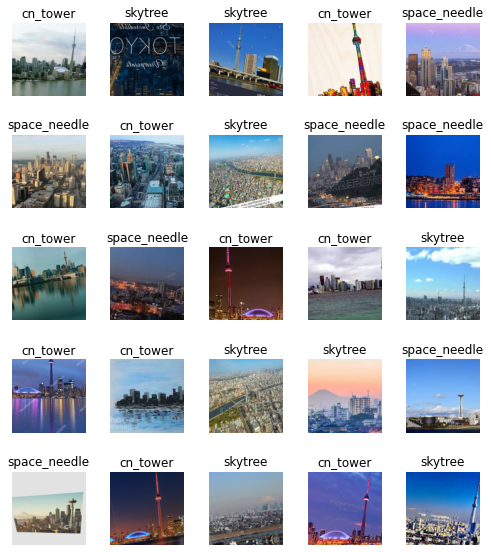

In [10]:
data.show_batch(rows=5, figsize=(7,8))

In [5]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cn_tower', 'skytree', 'space_needle'], 3, 773, 193)

### Train Model

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.486239,0.644112,0.248705,00:04
1,1.076678,0.495064,0.165803,00:03
2,0.911548,0.481462,0.145078,00:03
3,0.792371,0.466821,0.145078,00:03


In [8]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

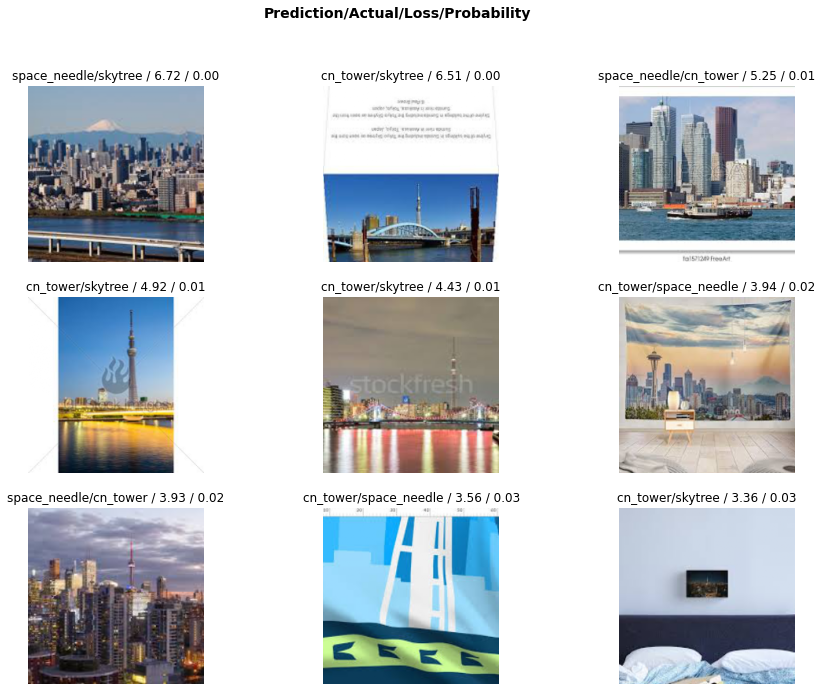

In [9]:
interp.plot_top_losses(9, figsize=(15,11))

### Prune Data

In [15]:
# Create databunch with all images in training set
db = (ImageList.from_folder(path).split_none().label_from_folder().databunch(no_check=True))

In [21]:
learn = cnn_learner(db, models.resnet18, metrics=error_rate)
learn.fit_one_cycle(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/jupyter/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/opt/conda/lib/python3.7/site-packages/fastai/torch_core.py", line 127, in data_collate
    return torch.utils.data.dataloader.default_collate(to_data(batch))
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 79, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 79, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 55, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 275 and 168 in dimension 2 at /opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/TH/generic/THTensor.cpp:612
